Grup #3
Proyecto Final Modelos de regresion Lineal
Integrantes

*  Gabriela Zepeda
*  Josue Garcia Martinez
*  Pasquale Chello Carias





In [ ]:
##Librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To build models for prediction
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor

from sklearn.preprocessing import LabelEncoder

#for tuning the model
from sklearn.model_selection import GridSearchCV

# To check model performance
from sklearn.metrics import make_scorer,mean_squared_error, r2_score, mean_absolute_error

hola hola como va cara de ano

In [ ]:
# Datos Prueba Modelo

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


importanso la informacion desde el drive

In [ ]:
# Imprando datos
df = pd.read_csv('/content/drive/MyDrive/ProyectoSalarios.csv')

df.head()


,Index,Age,Income,EducYears,HoursWPerWeek,PrevJobs,Distance,Credit,Savings,Expenses,Dependents,Health,YearJob,Gender,Status,EducationLevel,Spending
0,0,56,138.36,16,58,5,41.6,458.03,54.17,6.23,0,70.05,6,Female,Married,High School,173.26
1,1,46,58.73,16,25,6,11.6,453.86,84.16,8.56,3,40.18,5,Female,Single,PhD,149.67
2,2,32,88.07,17,24,4,40.7,482.60,34.59,18.70,2,7.63,3,Male,Single,Master,130.97
3,3,60,110.69,16,46,6,39.5,664.54,71.18,7.43,0,73.27,3,Male,Single,Master,197.16
4,4,25,123.54,12,58,0,32.0,778.85,99.38,18.36,0,61.69,9,Male,Single,High School,237.65


birrando columna IndeX

In [ ]:

import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/ProyectoSalarios.csv')

df.head()

df = df.drop('Index', axis=1)


In [ ]:
df.head()

,Age,Income,EducYears,HoursWPerWeek,PrevJobs,Distance,Credit,Savings,Expenses,Dependents,Health,YearJob,Gender,Status,EducationLevel,Spending
0,56,138.36,16,58,5,41.6,458.03,54.17,6.23,0,70.05,6,Female,Married,High School,173.26
1,46,58.73,16,25,6,11.6,453.86,84.16,8.56,3,40.18,5,Female,Single,PhD,149.67
2,32,88.07,17,24,4,40.7,482.60,34.59,18.70,2,7.63,3,Male,Single,Master,130.97
3,60,110.69,16,46,6,39.5,664.54,71.18,7.43,0,73.27,3,Male,Single,Master,197.16
4,25,123.54,12,58,0,32.0,778.85,99.38,18.36,0,61.69,9,Male,Single,High School,237.65


In [ ]:
## Creacion Data

data = pd.read_csv("/content/drive/MyDrive/ProyectoSalarios.csv")
data.head()

,Index,Age,Income,EducYears,HoursWPerWeek,PrevJobs,Distance,Credit,Savings,Expenses,Dependents,Health,YearJob,Gender,Status,EducationLevel,Spending
0,0,56,138.36,16,58,5,41.6,458.03,54.17,6.23,0,70.05,6,Female,Married,High School,173.26
1,1,46,58.73,16,25,6,11.6,453.86,84.16,8.56,3,40.18,5,Female,Single,PhD,149.67
2,2,32,88.07,17,24,4,40.7,482.60,34.59,18.70,2,7.63,3,Male,Single,Master,130.97
3,3,60,110.69,16,46,6,39.5,664.54,71.18,7.43,0,73.27,3,Male,Single,Master,197.16
4,4,25,123.54,12,58,0,32.0,778.85,99.38,18.36,0,61.69,9,Male,Single,High School,237.65


In [ ]:
# iNFORMACION DEL dF
df.info()
df.head()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             699 non-null    int64  
 1   Income          699 non-null    float64
 2   EducYears       699 non-null    int64  
 3   HoursWPerWeek   699 non-null    int64  
 4   PrevJobs        699 non-null    int64  
 5   Distance        699 non-null    float64
 6   Credit          699 non-null    float64
 7   Savings         699 non-null    float64
 8   Expenses        699 non-null    float64
 9   Dependents      699 non-null    int64  
 10  Health          699 non-null    float64
 11  YearJob         699 non-null    int64  
 12  Gender          699 non-null    object 
 13  Status          699 non-null    object 
 14  EducationLevel  699 non-null    object 
 15  Spending        699 non-null    float64
dtypes: float64(7), int64(6), object(3)
memory usage: 87.5+ KB


,Age,Income,EducYears,HoursWPerWeek,PrevJobs,Distance,Credit,Savings,Expenses,Dependents,Health,YearJob,Spending
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,41.351931,86.383906,15.412017,39.862661,4.502146,26.167382,567.203047,49.801874,10.240429,1.927039,51.075451,5.078684,170.283805
std,13.314868,37.460195,2.257537,11.784285,2.881804,13.879621,160.822942,28.189042,5.653216,1.420924,29.301730,2.554470,38.854920
min,18.000000,20.030000,12.000000,20.000000,0.000000,1.200000,300.100000,1.270000,1.010000,0.000000,0.290000,1.000000,83.720000
25%,30.000000,54.055000,13.000000,29.000000,2.000000,14.600000,427.550000,25.470000,5.140000,1.000000,26.430000,3.000000,140.945000
50%,42.000000,88.460000,15.000000,40.000000,5.000000,26.600000,563.080000,49.740000,10.250000,2.000000,52.050000,5.000000,168.190000
75%,52.000000,118.230000,17.000000,50.000000,7.000000,37.900000,704.200000,74.300000,14.945000,3.000000,77.015000,7.000000,200.705000
max,64.000000,149.920000,19.000000,60.000000,9.000000,49.800000,848.300000,99.750000,20.000000,4.000000,99.820000,9.000000,270.280000


In [ ]:
data.head()

,Index,Age,Income,EducYears,HoursWPerWeek,PrevJobs,Distance,Credit,Savings,Expenses,Dependents,Health,YearJob,Gender,Status,EducationLevel,Spending
0,0,56,138.36,16,58,5,41.6,458.03,54.17,6.23,0,70.05,6,Female,Married,High School,173.26
1,1,46,58.73,16,25,6,11.6,453.86,84.16,8.56,3,40.18,5,Female,Single,PhD,149.67
2,2,32,88.07,17,24,4,40.7,482.60,34.59,18.70,2,7.63,3,Male,Single,Master,130.97
3,3,60,110.69,16,46,6,39.5,664.54,71.18,7.43,0,73.27,3,Male,Single,Master,197.16
4,4,25,123.54,12,58,0,32.0,778.85,99.38,18.36,0,61.69,9,Male,Single,High School,237.65


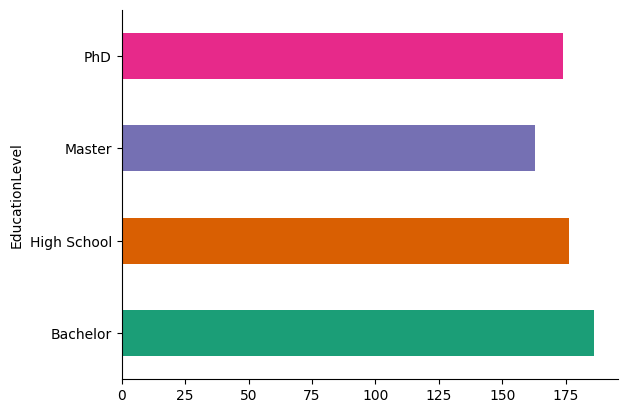

In [ ]:
# @title EducationLevel

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('EducationLevel').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

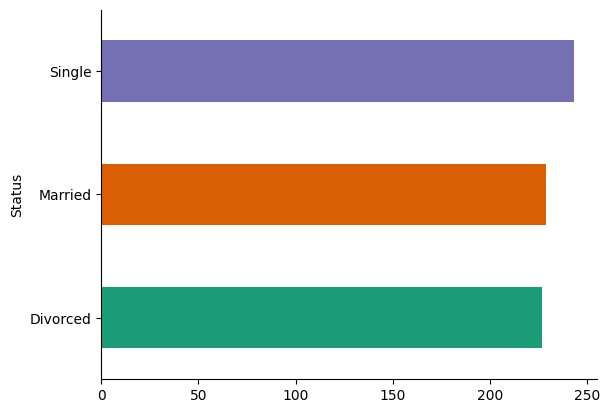

In [ ]:
# @title Status

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('Status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

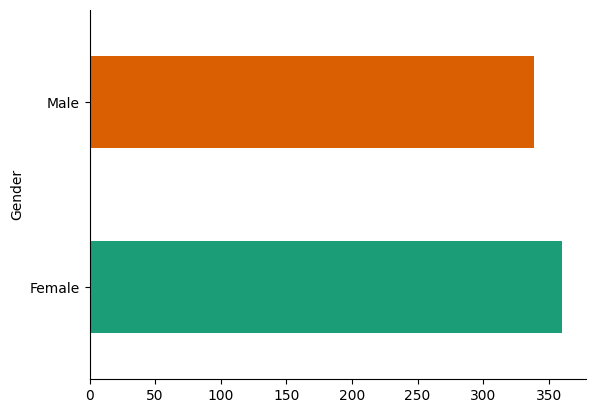

In [ ]:
# @title Gender

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

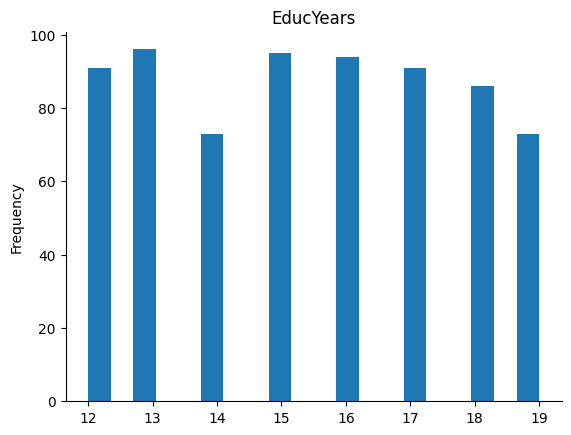

In [ ]:
# @title EducYears

from matplotlib import pyplot as plt
data['EducYears'].plot(kind='hist', bins=20, title='EducYears')
plt.gca().spines[['top', 'right',]].set_visible(False)

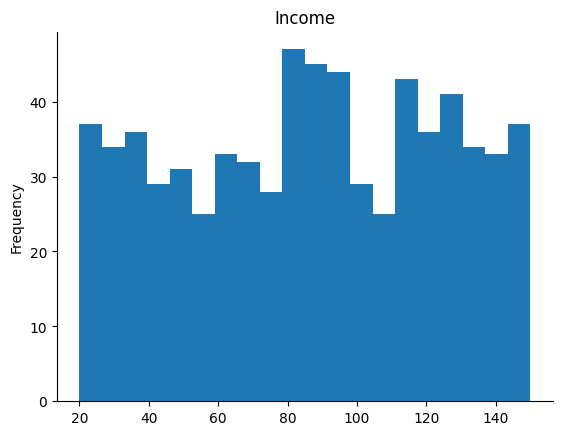

In [ ]:
# @title Income

from matplotlib import pyplot as plt
data['Income'].plot(kind='hist', bins=20, title='Income')
plt.gca().spines[['top', 'right',]].set_visible(False)

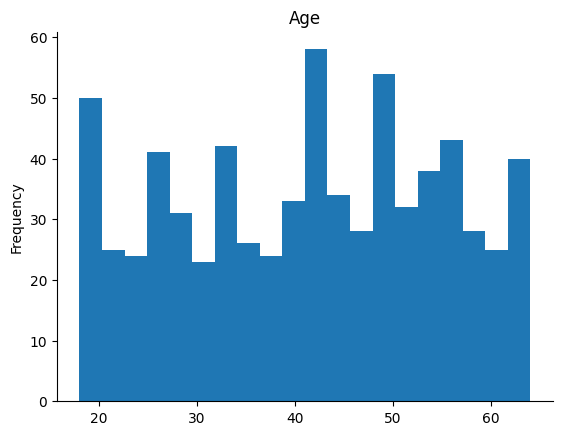

In [ ]:
# @title Age

from matplotlib import pyplot as plt
data['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# volver a eliminar Index no se porque no lo elimino con el anterior mado de la data
data = data.drop('Index', axis=1)


In [ ]:
data.head()


,Age,Income,EducYears,HoursWPerWeek,PrevJobs,Distance,Credit,Savings,Expenses,Dependents,Health,YearJob,Gender,Status,EducationLevel,Spending
0,56,138.36,16,58,5,41.6,458.03,54.17,6.23,0,70.05,6,Female,Married,High School,173.26
1,46,58.73,16,25,6,11.6,453.86,84.16,8.56,3,40.18,5,Female,Single,PhD,149.67
2,32,88.07,17,24,4,40.7,482.60,34.59,18.70,2,7.63,3,Male,Single,Master,130.97
3,60,110.69,16,46,6,39.5,664.54,71.18,7.43,0,73.27,3,Male,Single,Master,197.16
4,25,123.54,12,58,0,32.0,778.85,99.38,18.36,0,61.69,9,Male,Single,High School,237.65


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             699 non-null    int64  
 1   Income          699 non-null    float64
 2   EducYears       699 non-null    int64  
 3   HoursWPerWeek   699 non-null    int64  
 4   PrevJobs        699 non-null    int64  
 5   Distance        699 non-null    float64
 6   Credit          699 non-null    float64
 7   Savings         699 non-null    float64
 8   Expenses        699 non-null    float64
 9   Dependents      699 non-null    int64  
 10  Health          699 non-null    float64
 11  YearJob         699 non-null    int64  
 12  Gender          699 non-null    object 
 13  Status          699 non-null    object 
 14  EducationLevel  699 non-null    object 
 15  Spending        699 non-null    float64
dtypes: float64(7), int64(6), object(3)
memory usage: 87.5+ KB


In [ ]:
data.tail()

,Age,Income,EducYears,HoursWPerWeek,PrevJobs,Distance,Credit,Savings,Expenses,Dependents,Health,YearJob,Gender,Status,EducationLevel,Spending
694,45,108.46,18,49,9,42.0,372.76,91.06,8.29,0,14.21,7,Female,Married,Bachelor,143.81
695,45,71.42,14,26,2,3.5,837.67,85.33,9.44,4,63.98,3,Male,Single,Bachelor,214.22
696,54,146.71,12,54,7,23.8,620.45,6.20,3.69,4,5.47,6,Female,Married,PhD,223.87
697,58,113.85,14,48,0,19.6,847.51,11.34,2.95,1,40.74,7,Female,Married,Master,254.37
698,53,105.41,16,56,8,16.5,801.33,57.33,11.17,3,17.74,1,Female,Married,High School,244.26


In [ ]:
data.shape

(699, 16)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             699 non-null    int64  
 1   Income          699 non-null    float64
 2   EducYears       699 non-null    int64  
 3   HoursWPerWeek   699 non-null    int64  
 4   PrevJobs        699 non-null    int64  
 5   Distance        699 non-null    float64
 6   Credit          699 non-null    float64
 7   Savings         699 non-null    float64
 8   Expenses        699 non-null    float64
 9   Dependents      699 non-null    int64  
 10  Health          699 non-null    float64
 11  YearJob         699 non-null    int64  
 12  Gender          699 non-null    object 
 13  Status          699 non-null    object 
 14  EducationLevel  699 non-null    object 
 15  Spending        699 non-null    float64
dtypes: float64(7), int64(6), object(3)
memory usage: 87.5+ KB


In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,699.0,41.351931,13.314868,18.00,30.000,42.00,52.000,64.00
Income,699.0,86.383906,37.460195,20.03,54.055,88.46,118.230,149.92
EducYears,699.0,15.412017,2.257537,12.00,13.000,15.00,17.000,19.00
HoursWPerWeek,699.0,39.862661,11.784285,20.00,29.000,40.00,50.000,60.00
PrevJobs,699.0,4.502146,2.881804,0.00,2.000,5.00,7.000,9.00
Distance,699.0,26.167382,13.879621,1.20,14.600,26.60,37.900,49.80
Credit,699.0,567.203047,160.822942,300.10,427.550,563.08,704.200,848.30
Savings,699.0,49.801874,28.189042,1.27,25.470,49.74,74.300,99.75
Expenses,699.0,10.240429,5.653216,1.01,5.140,10.25,14.945,20.00
Dependents,699.0,1.927039,1.420924,0.00,1.000,2.00,3.000,4.00


In [ ]:
cat_col = ["Gender", "Status", "EducationLevel"]

In [ ]:
for column in cat_col:
    print(data[column].value_counts(1))
    print("-" * 50)

Gender
Female    0.515021
Male      0.484979
Name: proportion, dtype: float64
--------------------------------------------------
Status
Single      0.347639
Married     0.327611
Divorced    0.324750
Name: proportion, dtype: float64
--------------------------------------------------
EducationLevel
Bachelor       0.266094
High School    0.251788
PhD            0.248927
Master         0.233190
Name: proportion, dtype: float64
--------------------------------------------------


<Figure size 1200x800 with 0 Axes>

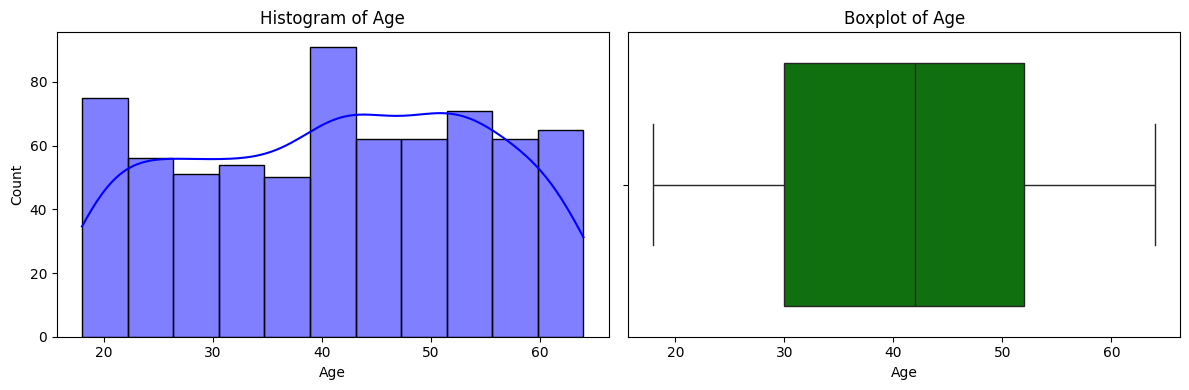

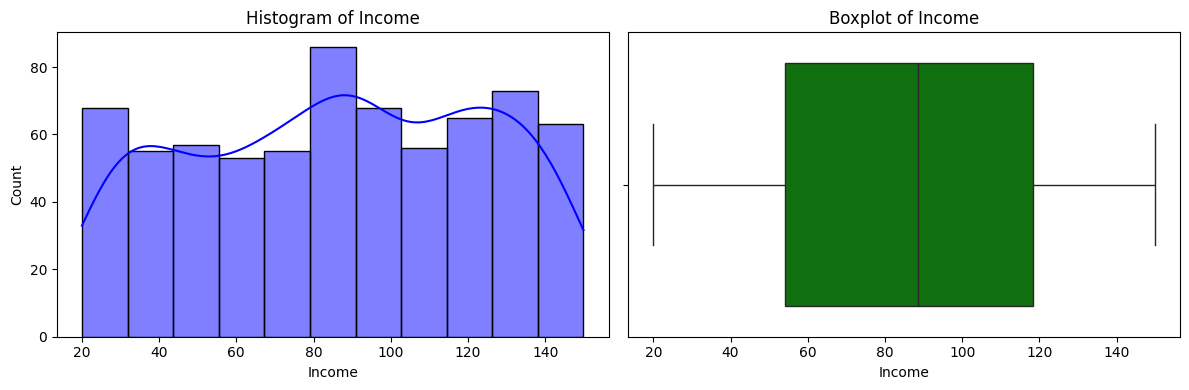

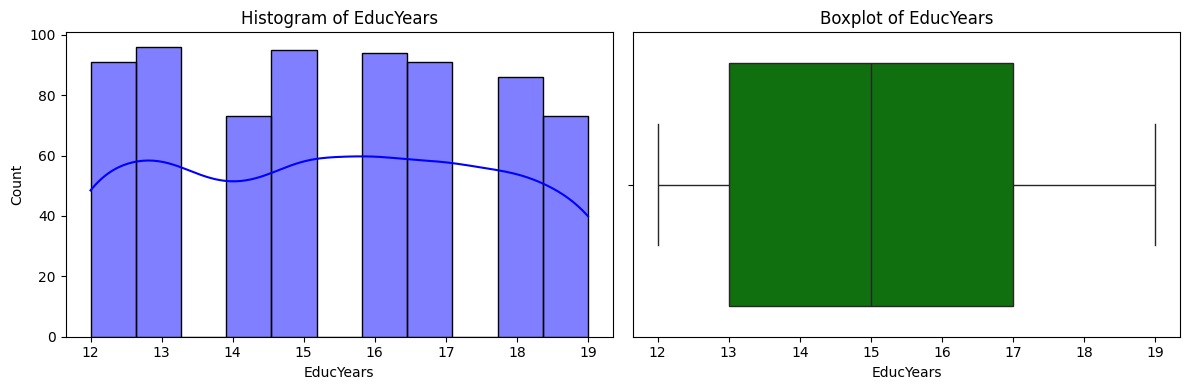

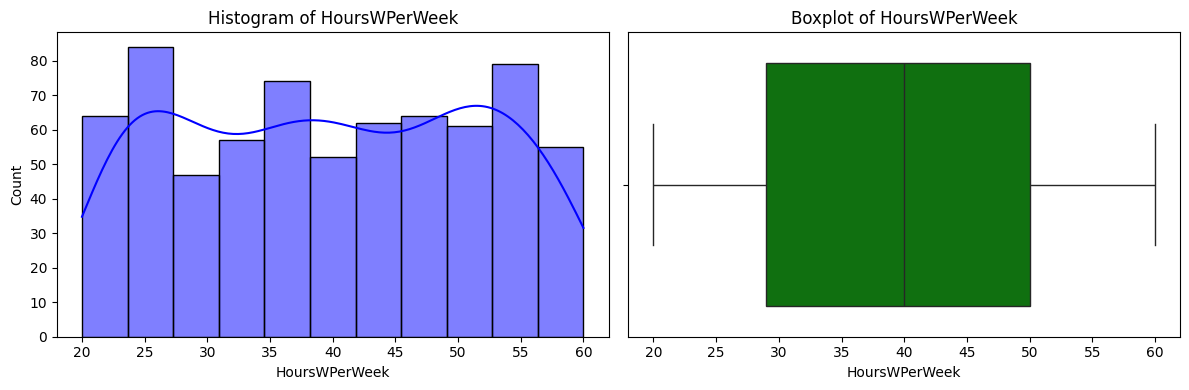

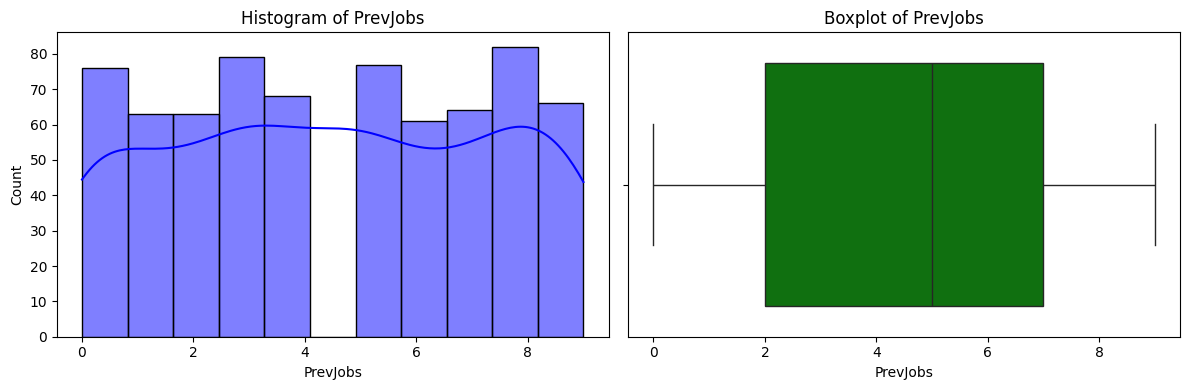

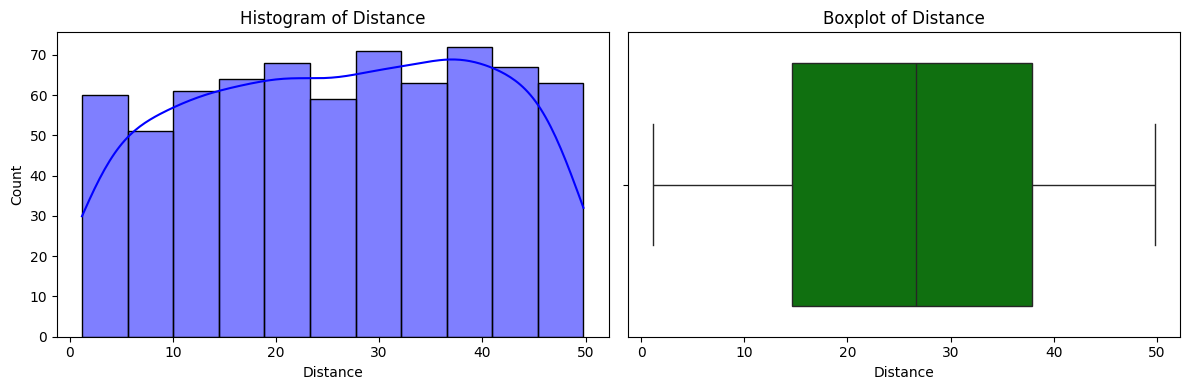

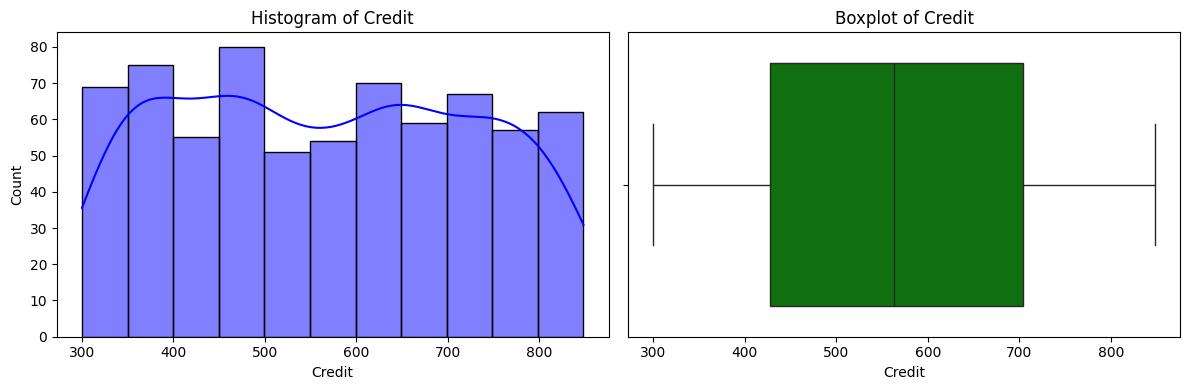

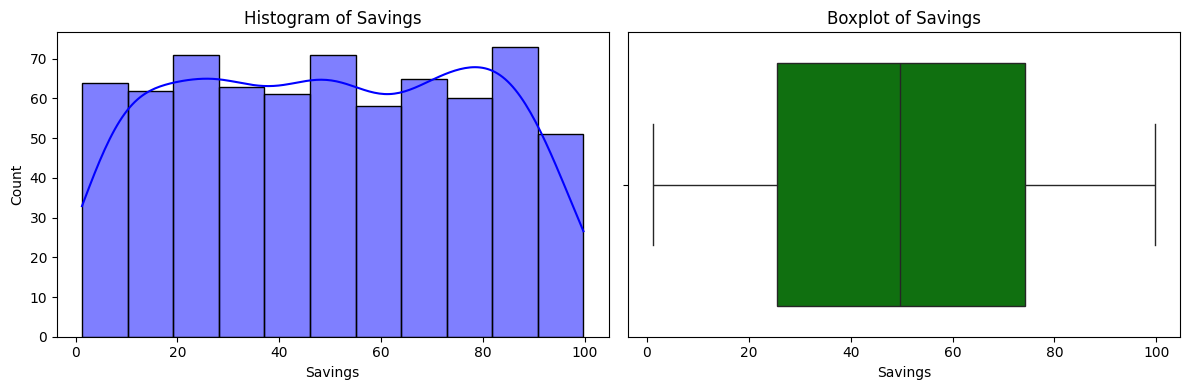

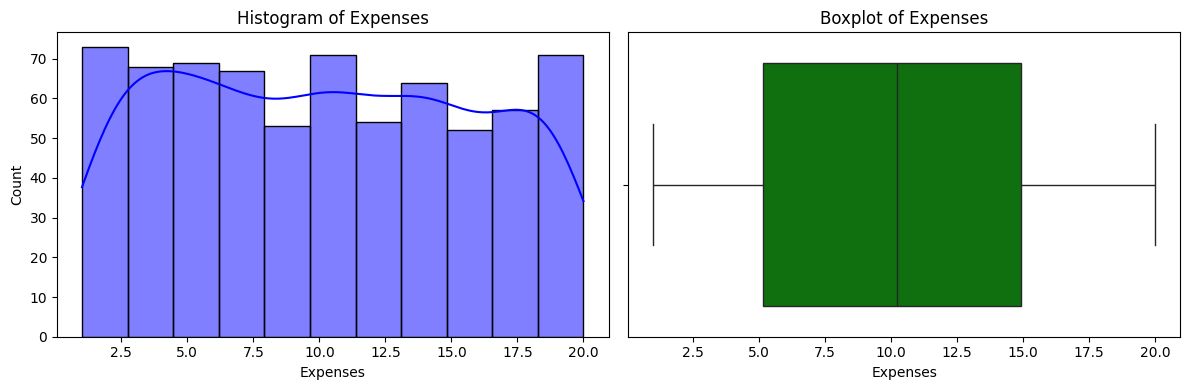

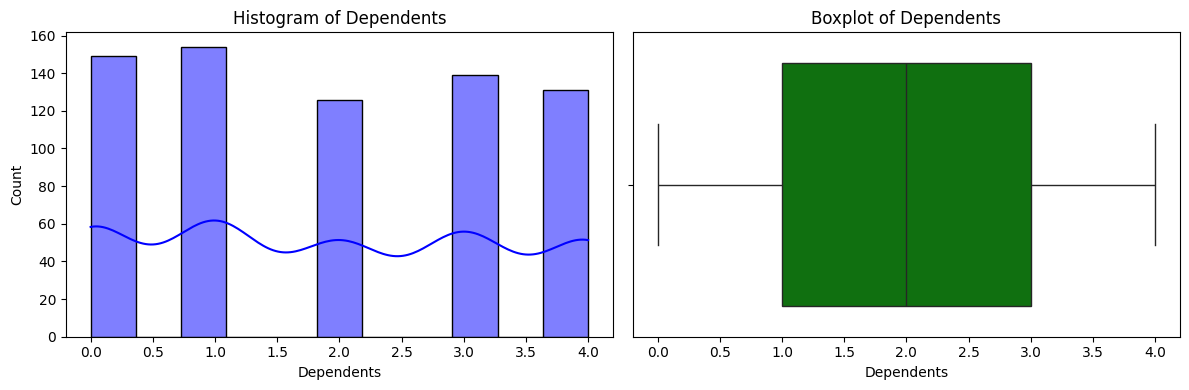

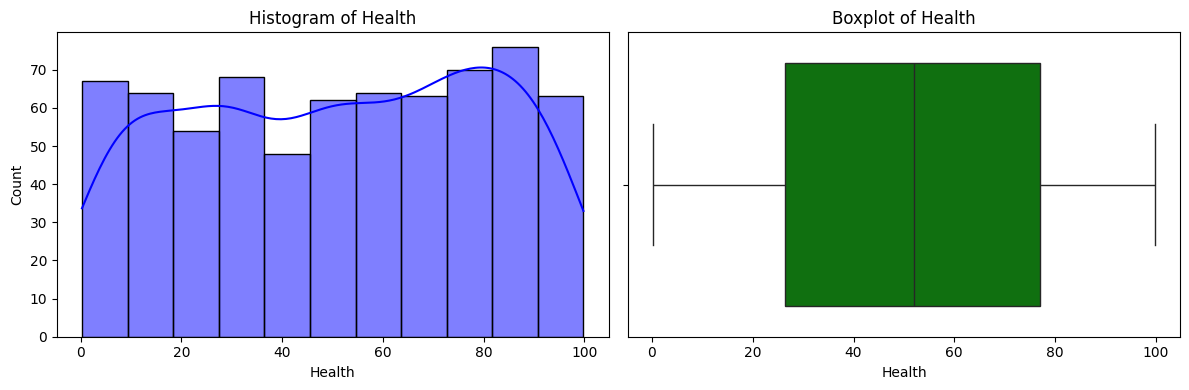

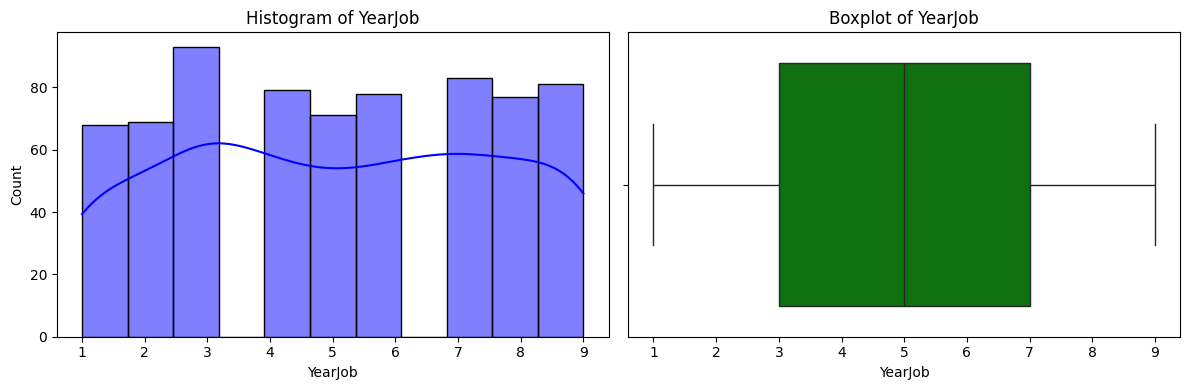

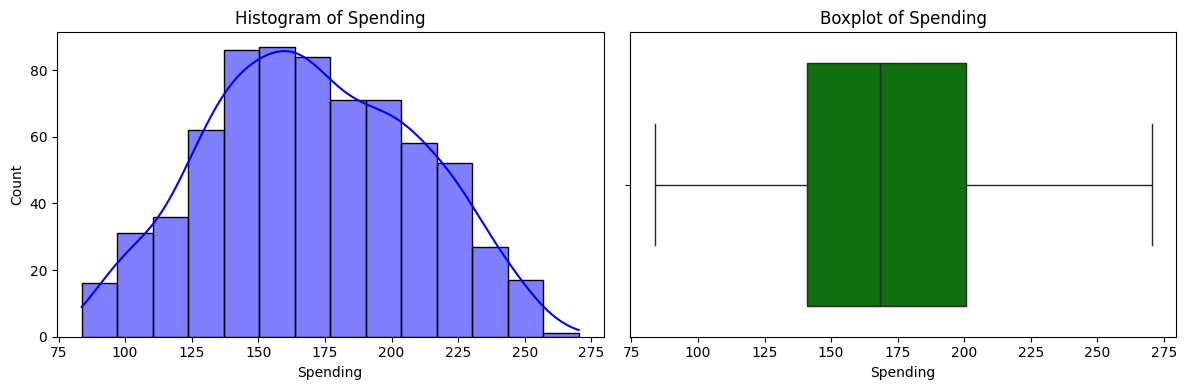

In [ ]:
plt.figure(figsize=(12, 8))

# Define num_col with numerical columns from the 'data' DataFrame
num_col = data.select_dtypes(include=np.number).columns.tolist()

# Loop through the numerical columns and create histograms and box plots
for col in num_col:
    plt.figure(figsize=(12, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[col], kde=True, color='blue')
    plt.title(f'Histogram of {col}')

    # Box Plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col], color='green')
    plt.title(f'Boxplot of {col}')

    # Show the plots
    plt.tight_layout()
    plt.show()

Se crean dos triangulos, la informacion que esta en uno de ellos se refleja igual en el otro.
Datos de onteres son Incomw, Credit y HoursWPWork. Pueden ser la variables que sean las qua hacen Match

<Axes: >

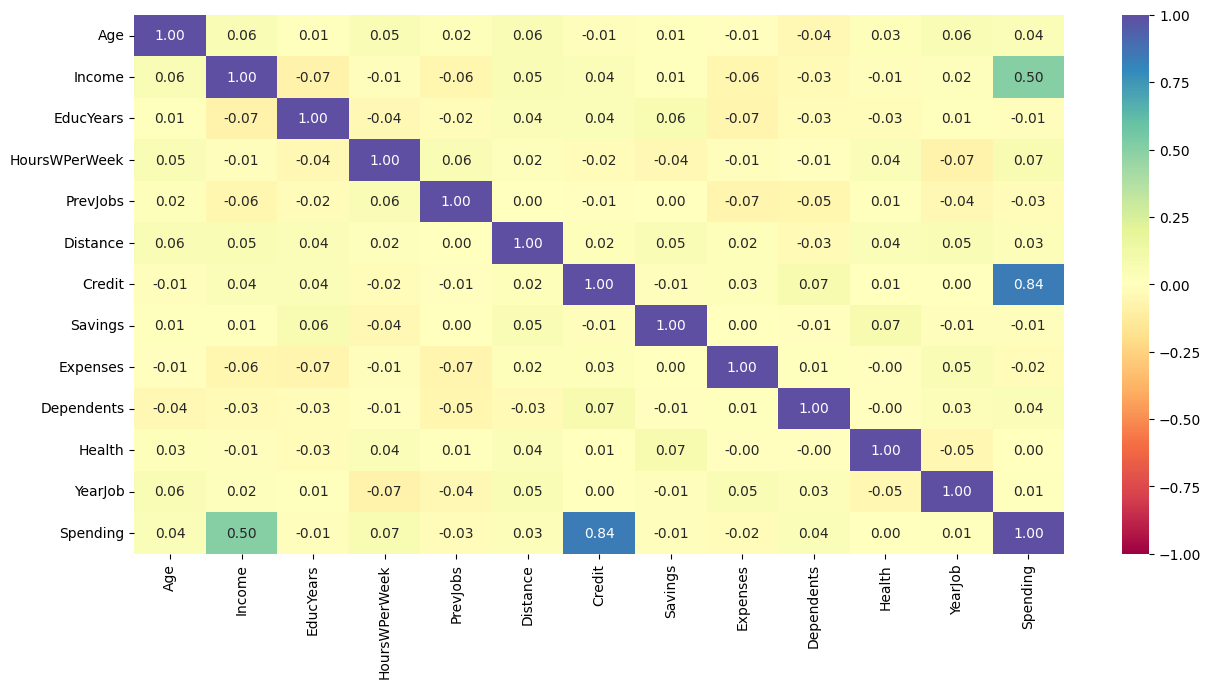

In [ ]:
#Relacion de dos variables
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(data.select_dtypes(exclude = 'object').corr(), annot=True, vmin=-1, vmax=1, fmt=".2f",cmap="Spectral")

In [ ]:
# Creando dummy variables
#drop_first=True is used to avoid redundant variables
data = pd.get_dummies(
    data,
    columns=data.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
    dtype = int
)

Trasformo los datos no numericoas a numericos

In [ ]:
#aca ya transformo la datos no nuericos en nu,mericos
data

,Age,Income,EducYears,HoursWPerWeek,PrevJobs,Distance,Credit,Savings,Expenses,Dependents,Health,YearJob,Spending,Gender_Male,Status_Married,Status_Single,EducationLevel_High School,EducationLevel_Master,EducationLevel_PhD
0,56,138.36,16,58,5,41.6,458.03,54.17,6.23,0,70.05,6,173.26,0,1,0,1,0,0
1,46,58.73,16,25,6,11.6,453.86,84.16,8.56,3,40.18,5,149.67,0,0,1,0,0,1
2,32,88.07,17,24,4,40.7,482.60,34.59,18.70,2,7.63,3,130.97,1,0,1,0,1,0
3,60,110.69,16,46,6,39.5,664.54,71.18,7.43,0,73.27,3,197.16,1,0,1,0,1,0
4,25,123.54,12,58,0,32.0,778.85,99.38,18.36,0,61.69,9,237.65,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,45,108.46,18,49,9,42.0,372.76,91.06,8.29,0,14.21,7,143.81,0,1,0,0,0,0
695,45,71.42,14,26,2,3.5,837.67,85.33,9.44,4,63.98,3,214.22,1,0,1,0,0,0
696,54,146.71,12,54,7,23.8,620.45,6.20,3.69,4,5.47,6,223.87,0,1,0,0,0,1
697,58,113.85,14,48,0,19.6,847.51,11.34,2.95,1,40.74,7,254.37,0,1,0,0,1,0


In [ ]:
#Separando var ind y dep
x=data.drop('Spending',axis=1)

y=data['Spending']

In [ ]:
#Separamos para entrenamiento
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=True,random_state=1)

In [ ]:
#Id final
print("Shape of Training set : ", x_train.shape)
print("Shape of test set : ", x_test.shape)

Shape of Training set :  (559, 18)
Shape of test set :  (140, 18)


In [ ]:
import statsmodels.api as sm

# Statsmodel api does not add a constant by default. We need to add it explicitly.
x_train1 = sm.add_constant(x_train)
# Add constant to test data
x_test1 = sm.add_constant(x_test)

# create the model
olsmodel1 = sm.OLS(y_train, x_train1).fit()

# get the model summary
olsmodel1.summary()
print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:               Spending   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     406.6
Date:                Fri, 25 Apr 2025   Prob (F-statistic):          4.55e-300
Time:                        00:13:47   Log-Likelihood:                -2089.4
No. Observations:                 559   AIC:                             4217.
Df Residuals:                     540   BIC:                             4299.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Habra que poner todasd las variables que tengan menos 0.05 hay que determinarlo en el analisis.

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [ ]:
# RMSE
def rmse(predictions, targets):
    return np.sqrt(((targets - predictions) ** 2).mean())


# MAPE
def mape(predictions, targets):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# MAE
def mae(predictions, targets):
    return np.mean(np.abs((targets - predictions)))


# Model Performance on test and train data
def model_pref(olsmodel, x_train, x_test, y_train,y_test):

    # Insample Prediction
    y_pred_train = olsmodel.predict(x_train)
    y_observed_train = y_train

    # Prediction on test data
    y_pred_test = olsmodel.predict(x_test)
    y_observed_test = y_test

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    rmse(y_pred_train, y_observed_train),
                    rmse(y_pred_test, y_observed_test),
                ],
                "MAE": [
                    mae(y_pred_train, y_observed_train),
                    mae(y_pred_test, y_observed_test),
                ],
                "MAPE": [
                    mape(y_pred_train, y_observed_train),
                    mape(y_pred_test, y_observed_test),
                ],
            }
        )
    )


In [ ]:
lin_reg_test = model_performance_regression(olsmodel1, x_test1, y_test)
lin_reg_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,10.958508,8.559779,0.920564,0.907987,5.486586


In [ ]:
model_pref(olsmodel1, x_train1, x_test1,y_train,y_test)

    Data       RMSE       MAE      MAPE
0  Train  10.163089  8.039702  4.997064
1   Test  10.958508  8.559779  5.486586


In [ ]:
# create the model
olsmodel1 = sm.OLS(y_train, x_train1).fit()

# get the model summary
olsmodel1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Spending   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     406.6
Date:                Fri, 25 Apr 2025   Prob (F-statistic):          4.55e-300
Time:                        00:14:05   Log-Likelihood:                -2089.4
No. Observations:                 559   AIC:                             4217.
Df Residuals:                     540   BIC:                             4299.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          6.5059      4.710      1.381      0.168      -2.747      15.758
Age                            0.0351      0.034      1.036      0.301      -0.031       0.102
Income                         0.4886      0.012     40.623      0.000       0.465       0.512
EducYears                     -0.2149      0.199     -1.080      0.281      -0.606       0.176
HoursWPerWeek                  0.3194      0.038      8.314      0.000       0.244       0.395
PrevJobs                       0.1110      0.154      0.722      0.471      -0.191       0.413
Distance                      -0.0327      0.032     -1.022      0.307      -0.095       0.030
Credit                         0.1979      0.003     71.997      0.000       0.193       0.203
Savings                       -0.0058      0.015     -0.372      0.710      -0.036       0.025
Expenses                      -0.1189      0.080     -1.491      0.137      -0.276       0.038
Dependents                    -0.0129      0.311     -0.041      0.967      -0.624       0.598
Health                        -0.0026      0.015     -0.169      0.866      -0.032       0.027
YearJob                        0.2229      0.173      1.287      0.199      -0.117       0.563
Gender_Male                   -1.8848      0.899     -2.098      0.036      -3.650      -0.120
Status_Married                 3.1954      1.098      2.911      0.004       1.039       5.352
Status_Single                  0.5413      1.094      0.495      0.621      -1.609       2.691
EducationLevel_High School    -2.3357      1.222     -1.912      0.056      -4.736       0.064
EducationLevel_Master         -1.1864      1.261     -0.941      0.347      -3.663       1.290
EducationLevel_PhD            -0.7004      1.226     -0.571      0.568      -3.108       1.707
==============================================================================
Omnibus:                        0.189   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.910   Jarque-Bera (JB):                0.116
Skew:                          -0.031   Prob(JB):                        0.944
Kurtosis:                       3.033   Cond. No.                     6.53e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Crear uno con las variables que si afectan al modelo

In [ ]:
# create the model after dropping variables
x_train2 = x_train1[['Income','HoursWPerWeek','Credit']]
x_test2 = x_test1[['Income','HoursWPerWeek','Credit']] # added brackets
# create the model
olsmodel2 = sm.OLS(y_train, x_train2).fit()
# get the model summary
olsmodel2.summary()
# get the model summary
olsmodel2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Spending   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          5.229e+04
Date:                Fri, 25 Apr 2025   Prob (F-statistic):                        0.00
Time:                        00:14:08   Log-Likelihood:                         -2103.7
No. Observations:                 559   AIC:                                      4213.
Df Residuals:                     556   BIC:                                      4226.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Income            0.4933      0.011     45.427      0.000       0.472       0.515
HoursWPerWeek     0.3637      0.029     12.515      0.000       0.307       0.421
Credit            0.1993      0.002     92.972      0.000       0.195       0.204
==============================================================================
Omnibus:                        0.046   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.977   Jarque-Bera (JB):                0.091
Skew:                          -0.020   Prob(JB):                        0.955
Kurtosis:                       2.952   Cond. No.                         39.7
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
lin_reg_test = model_performance_regression(olsmodel2, x_test2, y_test)
lin_reg_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,11.073735,8.755371,0.918885,0.917096,5.621407


In [ ]:
coef = olsmodel2.params
coef

,0
Income,0.493326
HoursWPerWeek,0.363698
Credit,0.199340


In [ ]:
# Comom quedaria la ecuacion final
Equation = "Spending"
print(Equation, end='\t')
for i in range(len(coef)):
    print('(', coef[i], ') * ', coef.index[i], '+', end = ' ')

Spending	( 0.493325853219539 ) *  Income + ( 0.3636978823242906 ) *  HoursWPerWeek + ( 0.19933977072751843 ) *  Credit + 

In [ ]:
# import the required function
from sklearn.model_selection import cross_val_score

# build the regression model using Sklearn Linear regression
linearregression = LinearRegression()

cv_Score11 = cross_val_score(linearregression, x_train2, y_train, cv = 10) #cv=10 represents data is divided into 10 folds.
cv_Score12 = cross_val_score(linearregression, x_train2, y_train, cv = 10,
                             scoring = 'neg_mean_squared_error')


print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std() * 2))

RSquared: 0.921 (+/- 0.062)
Mean Squared Error: 109.906 (+/- 50.008)


In [ ]:
x_train2 = x_train1[['Income','HoursWPerWeek','Credit']]
x_test2 = x_test1[['Income','HoursWPerWeek','Credit']]
# create the model
olsmodel3 = sm.OLS(y_train, x_train2).fit() # Changed x_train3 to x_train2
# get the model summary
olsmodel3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Spending   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          5.229e+04
Date:                Fri, 25 Apr 2025   Prob (F-statistic):                        0.00
Time:                        00:14:26   Log-Likelihood:                         -2103.7
No. Observations:                 559   AIC:                                      4213.
Df Residuals:                     556   BIC:                                      4226.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Income            0.4933      0.011     45.427      0.000       0.472       0.515
HoursWPerWeek     0.3637      0.029     12.515      0.000       0.307       0.421
Credit            0.1993      0.002     92.972      0.000       0.195       0.204
==============================================================================
Omnibus:                        0.046   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.977   Jarque-Bera (JB):                0.091
Skew:                          -0.020   Prob(JB):                        0.955
Kurtosis:                       2.952   Cond. No.                         39.7
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
lin_reg_test3 = model_performance_regression(olsmodel3, x_test2, y_test) # Changed x_test3 to x_test2
lin_reg_test3

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,11.073735,8.755371,0.918885,0.917096,5.621407


In [ ]:
cv_Score31 = cross_val_score(linearregression, x_train2, y_train, cv = 10) #cv=10 represents data is divided into 10 folds. # Changed x_train3 to x_train2
cv_Score32 = cross_val_score(linearregression, x_train2, y_train, cv = 10, # Changed x_train3 to x_train2
                             scoring = 'neg_mean_squared_error')


print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score31.mean(), cv_Score31.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score32.mean(), cv_Score32.std() * 2))

RSquared: 0.921 (+/- 0.062)
Mean Squared Error: 109.906 (+/- 50.008)


**Intervalo de confianza**

calculadora de datos para que el programa me da el resultado de cuando van a gastar busca las variables que al final den al modelo
historicamente busco como hacer que se proyecte
vamos a usar la biblioteca el operador
.predict, para correr los resultados buscados.

In [ ]:
df_pred = pd.read_csv("/content/drive/MyDrive/Predecir (3).csv")

es la calculadora que programe

In [ ]:
df_pred.head()

,Index,Age,Income,EducYears,HoursWPerWeek,PrevJobs,Distance,Credit,Savings,Expenses,Dependents,Health,YearJob,Gender,Status,EducationLevel
0,699,44,118.42,12,25,8,15.0,421.83,53.62,2.62,4,10.96,2,Female,Married,Master
1,700,34,143.84,15,44,9,5.5,330.89,46.34,6.76,1,56.70,4,Female,Married,Bachelor
2,701,26,138.02,17,44,1,16.4,440.60,40.28,15.15,1,92.83,8,Female,Divorced,High School
3,702,50,114.16,17,34,3,3.1,590.16,43.69,19.32,4,5.48,6,Female,Married,High School
4,703,37,117.39,14,38,7,39.3,394.38,57.36,14.64,1,42.16,1,Female,Divorced,High School


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Predecir (3).csv')

df.head()

df = df.drop('Index', axis=1)

In [ ]:
df_pred.head()

,Index,Age,Income,EducYears,HoursWPerWeek,PrevJobs,Distance,Credit,Savings,Expenses,Dependents,Health,YearJob,Gender,Status,EducationLevel
0,699,44,118.42,12,25,8,15.0,421.83,53.62,2.62,4,10.96,2,Female,Married,Master
1,700,34,143.84,15,44,9,5.5,330.89,46.34,6.76,1,56.70,4,Female,Married,Bachelor
2,701,26,138.02,17,44,1,16.4,440.60,40.28,15.15,1,92.83,8,Female,Divorced,High School
3,702,50,114.16,17,34,3,3.1,590.16,43.69,19.32,4,5.48,6,Female,Married,High School
4,703,37,117.39,14,38,7,39.3,394.38,57.36,14.64,1,42.16,1,Female,Divorced,High School


In [ ]:
# Drop the specified columns, correcting column names and enclosing them in strings
df_pred = df_pred.drop(columns=['Index', 'Age', 'EducYears', 'PrevJobs','Distance','Savings','Expenses','Dependents','Health','YearJob','Gender','Status', 'EducationLevel'])

# Display the first few rows of the modified DataFrame to verify changes
print(df_pred.head())


   Income  HoursWPerWeek  Credit
0  118.42             25  421.83
1  143.84             44  330.89
2  138.02             44  440.60
3  114.16             34  590.16
4  117.39             38  394.38


In [ ]:
from sklearn.model_selection import cross_val_score

# build the regression model using Sklearn Linear regression
linearregression = LinearRegression()

cv_Score11 = cross_val_score(linearregression, x_train2, y_train, cv = 10) #cv=10 represents data is divided into 10 folds.
cv_Score12 = cross_val_score(linearregression, x_train2, y_train, cv = 10,
                             scoring = 'neg_mean_squared_error')


print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std() * 2))

RSquared: 0.921 (+/- 0.062)
Mean Squared Error: 109.906 (+/- 50.008)


In [ ]:
Equation = "Spending"
print(Equation, end='\t')
for i in range(len(coef)):
    print('(', coef[i], ') * ', coef.index[i], '+', end = ' ')

Spending	( 0.493325853219539 ) *  Income + ( 0.3636978823242906 ) *  HoursWPerWeek + ( 0.19933977072751843 ) *  Credit + 

In [ ]:
olsmodel3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Spending   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          5.229e+04
Date:                Fri, 25 Apr 2025   Prob (F-statistic):                        0.00
Time:                        00:22:21   Log-Likelihood:                         -2103.7
No. Observations:                 559   AIC:                                      4213.
Df Residuals:                     556   BIC:                                      4226.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Income            0.4933      0.011     45.427      0.000       0.472       0.515
HoursWPerWeek     0.3637      0.029     12.515      0.000       0.307       0.421
Credit            0.1993      0.002     92.972      0.000       0.195       0.204
==============================================================================
Omnibus:                        0.046   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.977   Jarque-Bera (JB):                0.091
Skew:                          -0.020   Prob(JB):                        0.955
Kurtosis:                       2.952   Cond. No.                         39.7
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:

print(df_pred.columns)
predictions = olsmodel3.predict(df_pred)
predictions
print(x_test2.columns)
predictions = olsmodel3.predict(df_pred)
predictions


Index(['Income', 'HoursWPerWeek', 'Credit'], dtype='object')
Index(['Income', 'HoursWPerWeek', 'Credit'], dtype='object')


,0
0,151.599590
1,152.922234
2,171.920644
3,186.326166
4,150.347660
5,105.387386
6,145.162194
7,125.206322
8,92.212589
9,163.291705


Income','HoursWPerWeek','Credit'

Cambiar solo a las tres columnas interrsadas y  eliminar las demas y
Agrego la costante
Corro el modelo con la info
Resultado